In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [32]:
plt.rcParams['figure.figsize'] = 0.5 * np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [11]:
all_data = []

subMode_list = [-1, 0, 1, 2, 3]
thread_list = [1, 2, 4, 8]
for i in range(3):
    for subMode in subMode_list:
        for thread in thread_list:
            pre = f"/Users/weilu/Research/server/jan_2020/benchmark_cpu_multithread/new_server_cpu{thread}_{subMode}_{i}_step1e3/"
            info_file = "time.dat"
            location = f"{pre}/{info_file}"
            try:
                tmp = pd.read_csv(location, sep="\s+", names=["Time"])
                tmp = tmp.assign(Run=i, subMode=subMode, Thread=thread)
                all_data.append(tmp)
            except:
#                 print(pdb, i, folder)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/server_cpu_benchmark_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)


/Users/weilu/Research/data/openMM/server_cpu_benchmark_01-12.csv


In [47]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/server_cpu_benchmark_01-12.csv", index_col=0)

In [48]:
data["step_per_s"] = 1e3 / data["Time"]

In [53]:
a = data.groupby(["subMode", "Thread", "Mode"]).mean()

In [55]:
a.reset_index()

,subMode,Thread,Mode,Time,Run,step_per_s
0,-1,1,all,901.970427,1,1.108759
1,-1,2,all,753.329417,1,1.327520
2,-1,4,all,568.949616,1,1.757680
3,0,1,just backbone,54.104118,1,18.482943
4,0,2,just backbone,37.274760,1,26.839777
5,0,4,just backbone,22.582604,1,44.281978
6,1,1,frag only,57.658276,1,17.346599
7,1,2,frag only,40.993217,1,24.410237
8,1,4,frag only,27.715033,1,36.083981
9,2,1,contact only,453.809064,1,2.203735


In [49]:
convert = {"-1":"all", "0":"just backbone", "1":"frag only", "2":"contact only", "3":"beta only"}
data["Mode"] = data["subMode"].apply(lambda x: convert[str(x)])

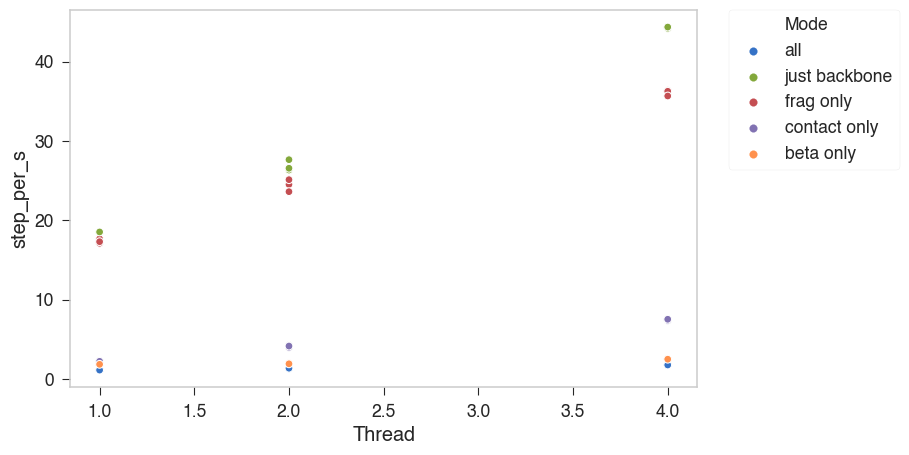

In [50]:
sns.scatterplot("Thread", "step_per_s", data=data, hue="Mode")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

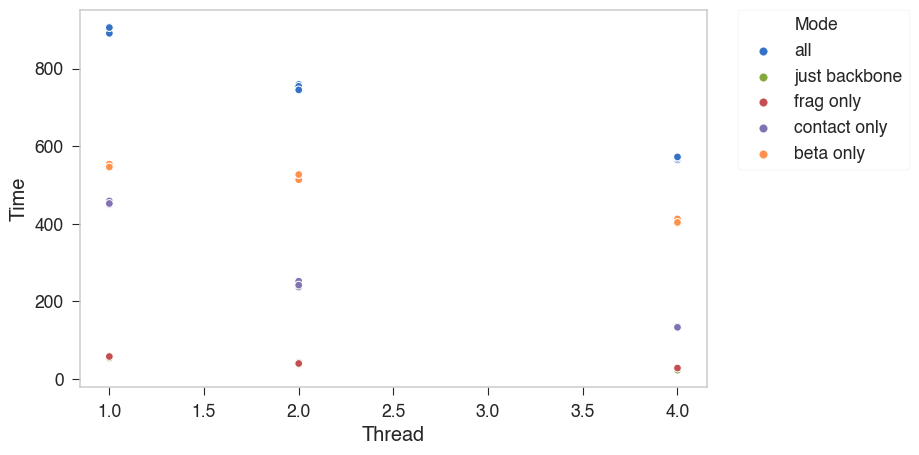

In [38]:
sns.scatterplot("Thread", "Time", data=data, hue="Mode")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [40]:
all_data = []

subMode_list = [-1, 0, 1, 2, 3]
thread = "GPU"
for i in range(3):
    for subMode in subMode_list:
        pre = f"/Users/weilu/Research/server/jan_2020/benchmark_cpu_multithread/server_gpu_{subMode}_{i}_step1e4/"
        info_file = "time.dat"
        location = f"{pre}/{info_file}"
        try:
            tmp = pd.read_csv(location, sep="\s+", names=["Time"])
            tmp = tmp.assign(Run=i, subMode=subMode, Thread=thread)
            all_data.append(tmp)
        except:
#                 print(pdb, i, folder)
            pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/server_cpu_benchmark_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)


/Users/weilu/Research/data/openMM/server_cpu_benchmark_01-13.csv


In [42]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/server_cpu_benchmark_01-13.csv", index_col=0)

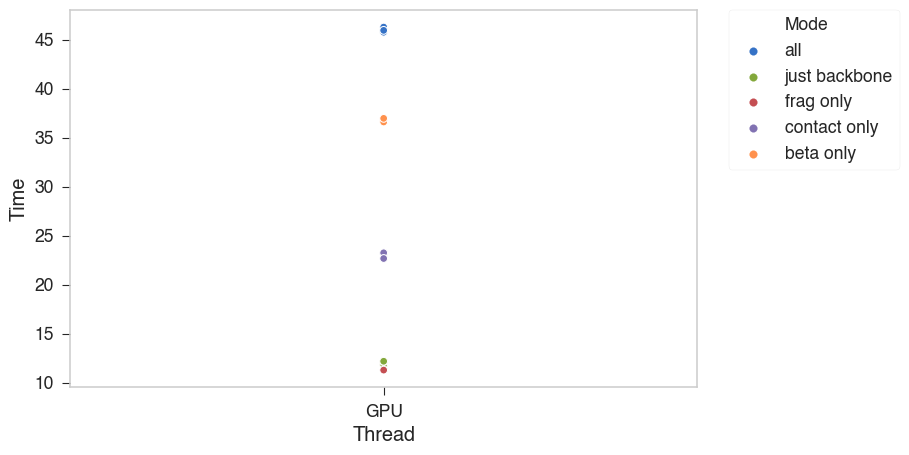

In [46]:
sns.scatterplot("Thread", "Time", data=data, hue="Mode")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [57]:
all_data = []

subMode_list = [4, 5, 6, 7, 8, 3]
thread = "GPU"
for i in range(2):
    for subMode in subMode_list:
        pre = f"/Users/weilu/Research/server/jan_2020/benchmark_cpu_multithread/server_gpu_{subMode}_{i}_step1e5/"
        info_file = "time.dat"
        location = f"{pre}/{info_file}"
        try:
            tmp = pd.read_csv(location, sep="\s+", names=["Time"])
            tmp = tmp.assign(Run=i, subMode=subMode, Thread=thread)
            all_data.append(tmp)
        except:
            print(location)
#                 print(pdb, i, folder)
            pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/server_cpu_benchmark_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)


/Users/weilu/Research/data/openMM/server_cpu_benchmark_01-13.csv


In [58]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/server_cpu_benchmark_01-13.csv", index_col=0)

In [59]:
convert = {"-1":"all", "0":"just backbone", "1":"frag only", "2":"contact only", "3":"beta only", 
          "4":"beta1", "5":"beta2", "6":"beta3", "7":"pap1", "8":"pap2"}
data["Mode"] = data["subMode"].apply(lambda x: convert[str(x)])

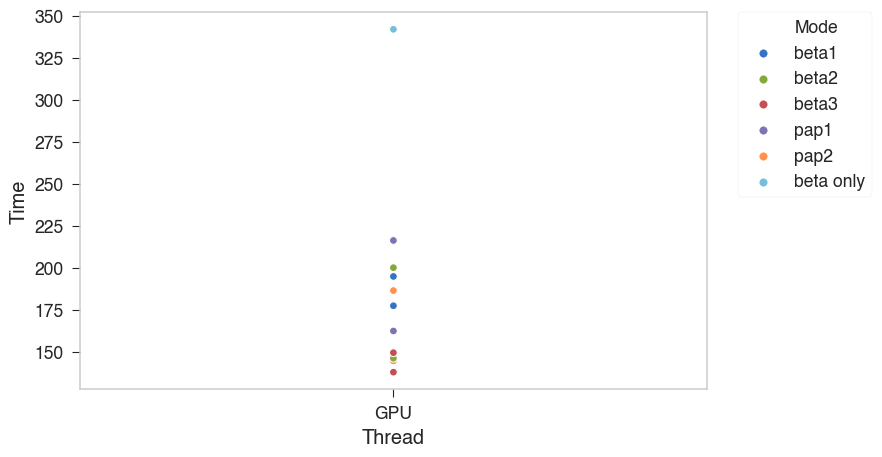

In [60]:
sns.scatterplot("Thread", "Time", data=data, hue="Mode")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [61]:
data

,Time,Run,subMode,Thread,Mode
0,194.683257,0,4,GPU,beta1
1,199.903383,0,5,GPU,beta2
2,137.715993,0,6,GPU,beta3
3,216.102161,0,7,GPU,pap1
4,144.417558,0,8,GPU,pap2
5,341.965201,0,3,GPU,beta only
6,177.243329,1,4,GPU,beta1
7,146.021486,1,5,GPU,beta2
8,149.305020,1,6,GPU,beta3
9,162.232694,1,7,GPU,pap1


In [7]:
pd.read_csv(location, sep="\s+", names=["Time"])

,Time
0,891.550305
